# Google Stock Price Prediction Recurrent Neural Network

#### Part 1: Data Preprocessing

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import training set
training_set=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=training_set.iloc[:,1:2].values

In [4]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [5]:
# Geting the input and output
X_train= training_set[0:1257]
y_train= training_set[1:1258]

In [8]:
# Reshaping
X_train=np.reshape(X_train, (1257 , 1 , 1))

#### Part 2: Building the RNN

In [12]:
# importing the Keras libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
# initialize the RNN
regressor = Sequential()

In [14]:
# adding the input layer and LSTM layer
regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

In [15]:
# adding the output layer
regressor.add(Dense( units=1 ))

In [16]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# fitting the RNN to the training set
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 2s 2ms/step - loss: 0.1599
Epoch 2/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.1128
Epoch 3/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.0864
Epoch 4/200
1257/1257 [==============================] - 0s 102us/step - loss: 0.0737
Epoch 5/200
1257/1257 [==============================] - 0s 97us/step - loss: 0.0682
Epoch 6/200
1257/1257 [==============================] - 0s 96us/step - loss: 0.0658
Epoch 7/200
1257/1257 [==============================] - 0s 95us/step - loss: 0.0643
Epoch 8/200
1257/1257 [==============================] - 0s 97us/step - loss: 0.0631
Epoch 9/200
1257/1257 [==============================] - 0s 101us/step - loss: 0.0618
Epoch 10/200
1257/1257 [==============================] - 0s 95us/step - loss: 0.0606
Epoch 11/200
1257/1257 [==============================] - 0s 99us/step - loss: 0.0592
Epoch 12/200
1257/1257 [==============================] - 0s 1

1257/1257 [==============================] - 0s 106us/step - loss: 2.4622e-04
Epoch 94/200
1257/1257 [==============================] - 0s 102us/step - loss: 2.4606e-04
Epoch 95/200
1257/1257 [==============================] - 0s 92us/step - loss: 2.4587e-04
Epoch 96/200
1257/1257 [==============================] - 0s 94us/step - loss: 2.4595e-04
Epoch 97/200
1257/1257 [==============================] - 0s 100us/step - loss: 2.4904e-04
Epoch 98/200
1257/1257 [==============================] - 0s 95us/step - loss: 2.4628e-04
Epoch 99/200
1257/1257 [==============================] - 0s 88us/step - loss: 2.4580e-04
Epoch 100/200
1257/1257 [==============================] - 0s 97us/step - loss: 2.4603e-04
Epoch 101/200
1257/1257 [==============================] - 0s 90us/step - loss: 2.4571e-04
Epoch 102/200
1257/1257 [==============================] - 0s 98us/step - loss: 2.4549e-04
Epoch 103/200
1257/1257 [==============================] - 0s 96us/step - loss: 2.4665e-04
Epoch 104/200
12

1257/1257 [==============================] - 0s 80us/step - loss: 2.4599e-04
Epoch 183/200
1257/1257 [==============================] - 0s 77us/step - loss: 2.4508e-04
Epoch 184/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.4499e-04
Epoch 185/200
1257/1257 [==============================] - 0s 80us/step - loss: 2.4679e-04
Epoch 186/200
1257/1257 [==============================] - 0s 80us/step - loss: 2.4635e-04
Epoch 187/200
1257/1257 [==============================] - 0s 80us/step - loss: 2.4924e-04
Epoch 188/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.4580e-04
Epoch 189/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.4508e-04
Epoch 190/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.4617e-04
Epoch 191/200
1257/1257 [==============================] - 0s 79us/step - loss: 2.4698e-04
Epoch 192/200
1257/1257 [==============================] - 0s 78us/step - loss: 2.4608e-04
Epoch 193/200

#### Part 3: Making the Prediction and Visulising the result

In [18]:
# Geting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [19]:
# Geting the Predicted Stock Price of 2017
inputs = real_stock_price

In [20]:
inputs = sc.transform(inputs)

In [21]:
inputs = np.reshape(inputs, (20 , 1, 1))

In [22]:
predicted_stock_price = regressor.predict(inputs)

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

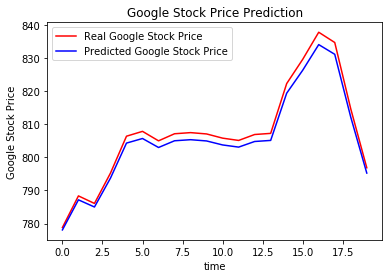

In [24]:
# Visulising the Result 
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()